In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from collections import Counter

from process import column_clearing, columns_creating, ClusterLassoPipeline
from custom_models import CustomKMeans, CustomDBSCAN, CustomGaussianMixture

# Загрузка данных и препроцессинг (#1-2)

In [3]:
df = pd.read_json(f"data/train.json")

In [4]:
df['interest_level'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})

In [5]:
df['features'] = column_clearing(df['features'])

In [6]:
all_features = []
for index, row in df.iterrows():
    features = row['features']
    if len(features) > 0:
        all_features.extend(features.split(","))

In [7]:
top_20_features = [feature for feature, count in Counter(all_features).most_common(20)]

In [8]:
columns_creating(top_20_features, df)

In [9]:
feature_list = top_20_features + ['bathrooms', 'bedrooms', 'interest_level'] + ['latitude', 'longitude'] + ['price']

# Прогонка моделей

In [10]:
df_slice = df.iloc[:10000]

In [71]:
clustering_methods = {
           'kmeans': KMeans(n_clusters=30, random_state=42),
           'dbscan': DBSCAN(eps=0.001, min_samples=5),
           'agglomerative': AgglomerativeClustering(n_clusters=30),
           'gmm': GaussianMixture(n_components=30, random_state=42),
           'Customkmeans': CustomKMeans(n_clusters=30, random_state=42),
           'Customdbscan': CustomDBSCAN(eps=0.001, min_samples=5),
           'Customgmm': CustomGaussianMixture(n_components=30, random_state=42)
        }

In [56]:
pipeline = ClusterLassoPipeline(
    dataframe=df_slice,
    features_list=feature_list,
    target='price',
    cluster_features=['longitude', 'latitude'],
    clustering_methods=clustering_methods,
    test_size=0.2,
    random_state=42
)

Обучение kmeans
Обучение dbscan
Обучение agglomerative
Обучение gmm
Обучение Customkmeans
Обучение Customdbscan
Обучение Customgmm


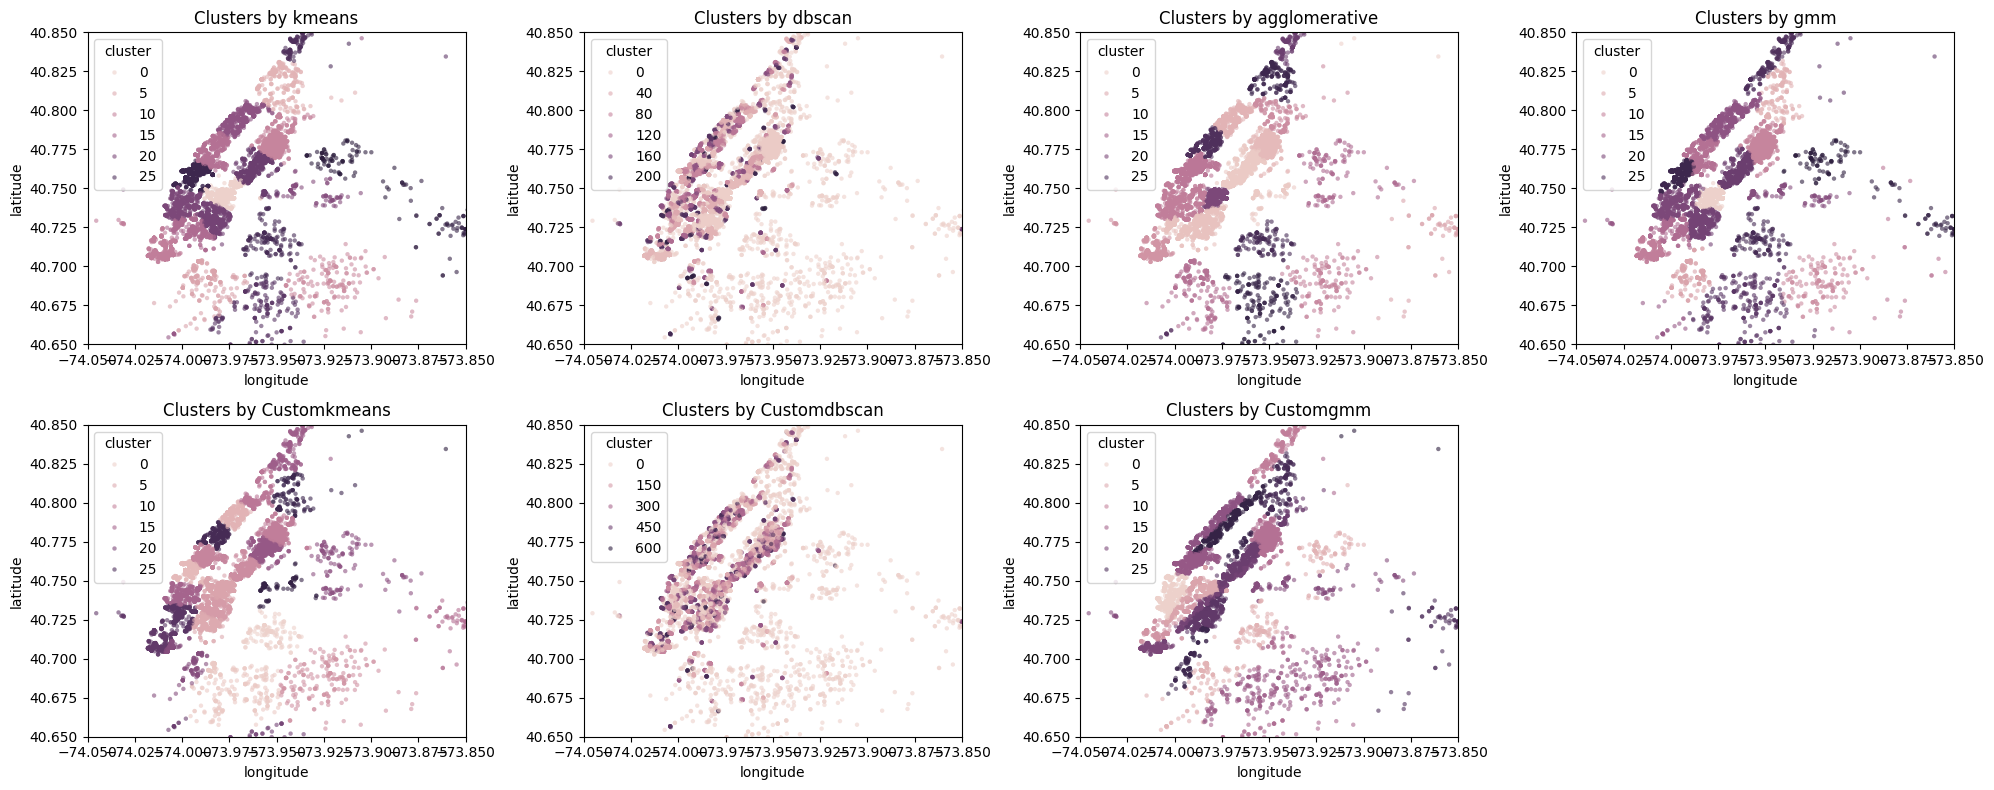

baseline     kmeans    dbscan  agglomerative           gmm  \
Metric     Phase                                                               
silhouette train       NaN   0.450323  0.077398       0.429469  4.263174e-01   
           test        NaN   0.473895 -0.109968       0.443583  4.479806e-01   
distortion train       NaN   0.140372       NaN            NaN  1.044413e+07   
           test        NaN  13.742250       NaN            NaN -1.013662e+04   
fit_time   -           NaN   0.036398  0.058206       2.581743  6.947370e-01   

                  Customkmeans  Customdbscan     Customgmm  
Metric     Phase                                            
silhouette train      0.404442      0.278129      0.087432  
           test       0.425982      0.192621      0.115209  
distortion train      0.239800           NaN -39663.187363  
           test      13.725151           NaN -10136.662528  
fit_time   -          0.263183      1.403009      6.696592

baseline        kmeans        dbscan  agglomerative  \
Metric Phase                                                            
MAE    train   1137.670650   1148.196641   1138.868897    1130.342515   
       test     971.596426    984.265373    973.671954     989.822140   
RMSE   train  12956.951977  12956.255970  12956.941810   12955.649433   
       test    1842.180233   1844.388910   1843.252250    1857.924915   
R2     train      0.020380      0.020485      0.020381       0.020577   
       test       0.399658      0.398218      0.398959       0.389352   

                       gmm  Customkmeans  Customdbscan     Customgmm  
Metric Phase                                                          
MAE    train   1152.066005   1178.142300   1143.493092   1148.808786  
       test    1025.909644   1077.234840    980.945405    970.497578  
RMSE   train  12955.157296  12952.892883  12956.825196  12956.549295  
       test    1869.892916   1912.430051   1847.402936   1843.681684  
R2     train      0.020651      0.020993      0.020399      0.020440  
       test       0.381460      0.352998      0.396249      0.398679

,baseline,kmeans,dbscan,agglomerative,gmm,Customkmeans,Customdbscan,Customgmm
bathrooms,12899.988924,12900.758017,12909.484571,12792.224238,12865.201365,12764.049312,12929.076584,12893.826972
bedrooms,4717.329658,4707.083757,4713.770384,4758.188163,4746.416771,4860.930728,4694.956657,4685.599693
Doorman,1328.275140,1294.326130,1329.302439,1311.012257,1281.582019,1374.347065,1334.383096,1331.807581
interest_level,1019.029964,1006.104950,1022.183845,1003.198107,988.371597,1033.183513,1033.267024,1010.775551
Elevator,666.545258,660.823146,667.773834,681.535474,665.997250,637.263942,669.588594,665.815710
LaundryinBuilding,573.332699,582.812649,574.595186,553.709320,606.473013,551.488146,575.200745,575.509879
LaundryinUnit,534.889168,541.986052,536.581978,528.136009,547.211443,488.401391,542.761840,537.984557
FitnessCenter,455.449394,441.695315,454.797511,454.348361,441.328452,519.002241,455.588217,450.072408
HardwoodFloors,393.395185,394.305666,393.946777,434.934472,404.747579,384.579730,386.610193,398.627299
LaundryInBuilding,360.644502,370.722650,362.335247,345.736999,370.418198,400.171445,362.260311,369.538183


In [57]:
pipeline.fit()
pipeline.plot_results()
pipeline.metrics_table()
pipeline.regression_metrics_table()
pipeline.feature_importances_table()

In [72]:
pipeline = ClusterLassoPipeline(
    dataframe=df_slice,
    features_list=feature_list,
    target='price',
    cluster_features=["bedrooms", "bathrooms", "interest_level"],
    clustering_methods=clustering_methods,
    test_size=0.2,
    random_state=42
)

Обучение kmeans
Обучение dbscan
Обучение agglomerative
Обучение gmm
Обучение Customkmeans
Обучение Customdbscan
Обучение Customgmm


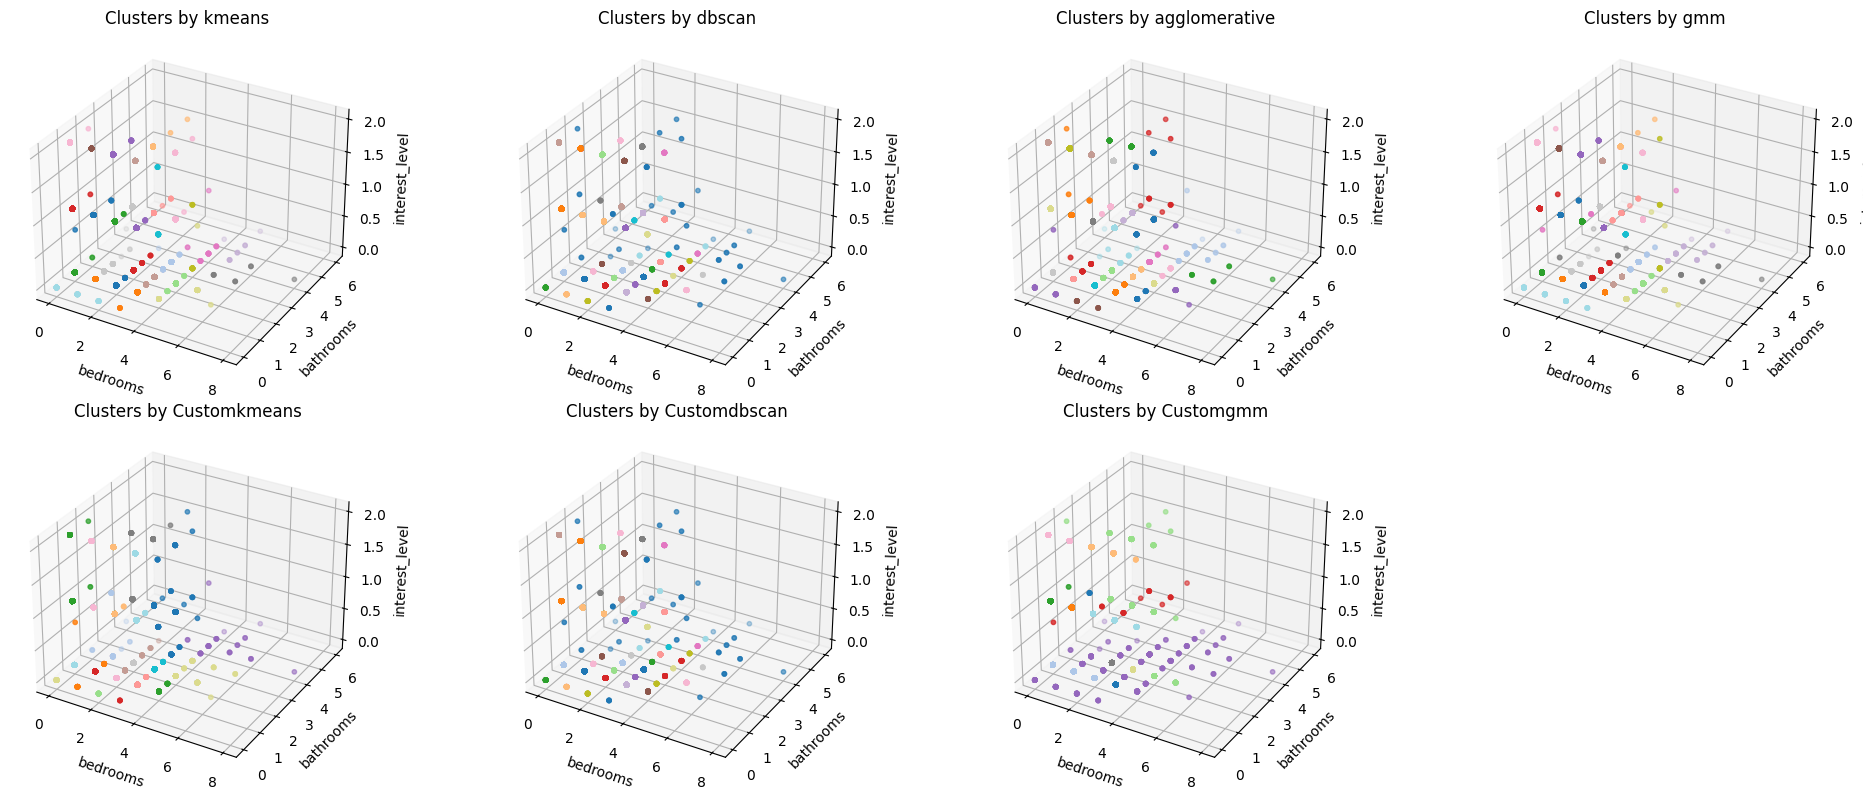

baseline     kmeans    dbscan  agglomerative           gmm  \
Metric     Phase                                                               
silhouette train       NaN   0.952025  0.988169       0.951165  9.502287e-01   
           test        NaN   0.959097  0.963703       0.957878  9.481008e-01   
distortion train       NaN  28.086580       NaN            NaN  5.385216e+06   
           test        NaN  59.201369       NaN            NaN -2.880960e+04   
fit_time   -           NaN   0.045753  0.240206       1.446306  4.090519e-01   

                  Customkmeans  Customdbscan      Customgmm  
Metric     Phase                                             
silhouette train      0.847673      0.988169       0.396320  
           test       0.863273      0.985618       0.583857  
distortion train    190.034280           NaN -120843.753947  
           test     263.781936           NaN  -30450.546261  
fit_time   -          0.075914      2.192999       9.808287

baseline        kmeans        dbscan  agglomerative  \
Metric Phase                                                            
MAE    train   1493.298538   1467.018075   1468.394838    1469.692150   
       test    1338.394251   1266.491230   1377.395685    1335.150139   
RMSE   train  13045.338429  13041.735347  13029.995769   13043.028282   
       test    2345.773197   2277.442070   2358.042597    2325.659075   
R2     train      0.006456      0.007004      0.008791       0.006808   
       test       0.084840      0.137380      0.075242       0.100467   

                       gmm  Customkmeans  Customdbscan     Customgmm  
Metric Phase                                                          
MAE    train   1466.015943   1491.399818   1468.394838   1462.241798  
       test    1262.209436   1335.328875   1286.604399   1310.510193  
RMSE   train  13042.157071  13045.189366  13029.995769  13040.931879  
       test    2267.853620   2340.645396   2267.631256   2301.963482  
R2     train      0.006940      0.006478      0.008791      0.007127  
       test       0.144628      0.088837      0.144796      0.118704

,baseline,kmeans,dbscan,agglomerative,gmm,Customkmeans,Customdbscan,Customgmm
Doorman,1456.326927,1465.838030,1609.072811,1466.245910,1466.472934,1448.860085,1609.072811,1481.250285
DiningRoom,1130.700876,1057.698943,937.210334,1105.723674,1060.881684,1135.735648,937.210334,1055.930021
LaundryinUnit,1093.440232,1062.573468,1018.529649,1062.171438,1066.101869,1094.401092,1018.529649,1073.066157
Terrace,855.773344,798.495912,812.251149,799.698632,805.930651,857.986333,812.251149,823.567663
HardwoodFloors,627.032071,607.149631,629.214889,603.919051,607.374155,626.266151,629.214889,632.920867
Elevator,625.847944,609.542563,661.603952,626.336115,608.580985,624.775577,661.603952,621.370070
LaundryinBuilding,590.830583,572.187865,596.268583,592.425611,575.146661,588.594672,596.268583,585.120159
LaundryInBuilding,560.105809,608.112281,764.676922,529.969678,602.184119,558.997211,764.676922,638.537776
SwimmingPool,416.497392,435.238002,375.516070,407.381001,433.806447,419.367536,375.516070,441.273101
FitnessCenter,413.945808,428.557380,321.538728,432.475827,424.948401,416.359239,321.538728,415.640083


In [73]:
pipeline.fit()
pipeline.plot_results()
pipeline.metrics_table()
pipeline.regression_metrics_table()
pipeline.feature_importances_table()